#Integrantes:




*    Luna Bela Dangú Hernández - lbdan19@gmail.com
*   Laura Berenice Luna Reyes - lauralunr@gmail.com
*   Carolina Chi Arceo - carochiar@gmail.com







# 1: Importar bibliotecas

In [160]:
import requests
import pandas as pd
import numpy as np
import pprint as pp
from IPython.display import display
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from matplotlib import font_manager
font_path = '/content/drive/MyDrive/BEDU/Proyecto_Final/Minecraft.ttf'
font_videogames = font_manager.FontProperties(fname=font_path)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
!pip install squarify
import squarify
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import folium


In [161]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 2: Obtención de datos

In [162]:
#Base principal de un csv:
#Esta función carga un archivo CSV y lo convierte directamente en un DataFrame de pandas, por lo que no necesitamos usar el pd.DataFrame
df = pd.read_csv('/content/drive/MyDrive/BEDU/Proyecto_Final/Video_Games_notclean.csv')
# Visualizar las primeras filas
df.head()

,index,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,0,Wii sPorTS,Wii,2006.0,spOrTS,nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,1,sUPER marIO bROs.,NES,1985.0,pLaTFOrM,nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,2,marIo KarT WiI,Wii,2008.0,RaCInG,nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,3,WiI spoRtS resORT,Wii,2009.0,sPoRts,nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,4,pOkemON REd/pOKEmOn BLue,GB,1996.0,roLE-playiNg,nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


### Video Game Dataset Description

- **Name**: The name of the video game. (String)
- **Platform**: The platform on which the game is available, such as PC, PS4, Xbox, etc. (String)
- **Year_of_Release**: The year in which the game was released. (Integer)
- **Genre**: The genre of the game, such as Action, Sports, etc. (String)
- **Publisher**: The company that published the game. (String)
- **NA_Sales**: The sales of the game in North America, in millions. (Float)
- **EU_Sales**: The sales of the game in Europe, in millions. (Float)
- **JP_Sales**: The sales of the game in Japan, in millions. (Float)
- **Other_Sales**: The sales of the game in other regions, in millions. (Float)
- **Global_Sales**: The total global sales of the game, in millions. (Float)
- **Critic_Score**: The average score given to the game by critics. (Float)
- **Critic_Count**: The number of critics who reviewed the game. (Integer)
- **User_Score**: The average score given to the game by users. (Float)
- **User_Count**: The number of users who reviewed the game. (Integer)
- **Developer**: The company that developed the game. (String)
- **Rating**: The ESRB rating of the game, such as E for Everyone, T for Teen, or M for Mature. (String)


In [163]:
#Información de una API

url = 'http://api.steampowered.com/ISteamApps/GetAppList/v2/'
response = requests.get(url)
data = response.json()

df_api = pd.DataFrame(data['applist']['apps'])
df_api

,appid,name
0,1941401,
1,2170321,
2,1825161,
3,1897482,
4,2112761,
...,...,...
219782,1433140,The Texas Chain Saw Massacre
219783,2182790,Riff XR
219784,2300340,Night Stones
219785,2644050,Echoes of Elysium


#3: Exploración de datos

In [164]:
#visualizar primeras 5 filas
df.head()

,index,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,0,Wii sPorTS,Wii,2006.0,spOrTS,nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,1,sUPER marIO bROs.,NES,1985.0,pLaTFOrM,nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,2,marIo KarT WiI,Wii,2008.0,RaCInG,nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,3,WiI spoRtS resORT,Wii,2009.0,sPoRts,nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,4,pOkemON REd/pOKEmOn BLue,GB,1996.0,roLE-playiNg,nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [165]:
# Información relevante de los datos creando una función y aplicando interpolación de strings
def info_general_df(df):
    print('Información general del DataFrame')
    print(f'Cantidad de filas y columnas: {df.shape}')
    print("-" * 50)
    print('Cantidad de datos nulos por columna:')
    display(df.isnull().sum().to_frame(name='Nulos'))
    print("-" * 50)
    print('Cantidad de datos únicos por columna:')
    display(df.nunique().to_frame(name='Únicos'))
    print("-" * 50)
    print('Tipos de datos por columna:')
    display(df.dtypes.to_frame(name='Tipos de datos'))
    print("-" * 50)
    print(f'Cantidad de duplicados: {df.duplicated().sum()}')
    print("-" * 50)
    print('Nombres de las columnas:')
    display(pd.DataFrame(df.columns, columns=['Columnas']))
    print("-" * 50)

# Llamamos a la función con nuestro DataFrame
info_general_df(df)


Información general del DataFrame
Cantidad de filas y columnas: (16928, 17)
--------------------------------------------------
Cantidad de datos nulos por columna:


,Nulos
index,0
Name,2
Platform,0
Year_of_Release,273
Genre,2
Publisher,55
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


--------------------------------------------------
Cantidad de datos únicos por columna:


,Únicos
index,16928
Name,16861
Platform,31
Year_of_Release,39
Genre,3252
Publisher,581
NA_Sales,402
EU_Sales,307
JP_Sales,244
Other_Sales,155


--------------------------------------------------
Tipos de datos por columna:


,Tipos de datos
index,int64
Name,object
Platform,object
Year_of_Release,float64
Genre,object
Publisher,object
NA_Sales,float64
EU_Sales,float64
JP_Sales,float64
Other_Sales,float64


--------------------------------------------------
Cantidad de duplicados: 0
--------------------------------------------------
Nombres de las columnas:


,Columnas
0,index
1,Name
2,Platform
3,Year_of_Release
4,Genre
5,Publisher
6,NA_Sales
7,EU_Sales
8,JP_Sales
9,Other_Sales


--------------------------------------------------


#4: Limpieza de datos

In [166]:
# Eliminar las filas y columnas que contienen valores NaN en y "all" y restablecer los índices del DataFrame.
df = df.dropna(axis=0, how='all').reset_index(drop=True)
df = df.dropna(axis=1, how='all').reset_index(drop=True)

#eliminaremos estas dos filas que solo contienen 2 NA cada una
df = df.dropna(subset=['Genre', 'Name'])


In [167]:
#Validar nuevamente valores NaN's
df.isnull().sum()

,0
index,0
Name,0
Platform,0
Year_of_Release,273
Genre,0
Publisher,55
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


In [168]:
# Eliminar duplicados
df.drop_duplicates(inplace=True)
df.tail()

,index,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
16923,16923,alIENs: COlOnial maRines,PS3,2013.0,sHoOTEr,sega,0.20,0.29,0.00,0.11,0.6,43.0,25.0,3.6,295.0,Gearbox Software,M
16924,16924,bACKYARd WrEStLINg: DOn'T try tHIs at hOME,PS2,2003.0,fiGhTIng,eidos interactive,0.30,0.23,0.00,0.08,0.6,51.0,24.0,7.8,29.0,Paradox Development,M
16925,16925,yaKuzA: DeAD sOULs,PS3,2011.0,SHOOtER,sega,0.09,0.06,0.42,0.03,0.6,64.0,55.0,7.4,69.0,Ryu ga Gotoku Studios,M
16926,16926,fIght niGHt RounD 2,XB,2005.0,fiGHTinG,electronic arts,0.42,0.16,0.00,0.02,0.6,88.0,48.0,8.8,27.0,EA Sports,T
16927,16927,MOnHUn NIkkI: POKA poKa AiLU mura,PSP,2010.0,Role-PlayiNG,capcom,0.00,0.00,0.60,0.00,0.6,NaN,NaN,NaN,NaN,NaN,NaN


In [169]:
#Eliminar columnas que no usaremos:
# df_dropped = df.drop(columns = ['User_Count','Critic_Count' ])
df_dropped = df
df_dropped.head()

,index,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,0,Wii sPorTS,Wii,2006.0,spOrTS,nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,1,sUPER marIO bROs.,NES,1985.0,pLaTFOrM,nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,2,marIo KarT WiI,Wii,2008.0,RaCInG,nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,3,WiI spoRtS resORT,Wii,2009.0,sPoRts,nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,4,pOkemON REd/pOKEmOn BLue,GB,1996.0,roLE-playiNg,nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [170]:
#Verificar y convertir tipos de datos
df_dropped.dtypes

,0
index,int64
Name,object
Platform,object
Year_of_Release,float64
Genre,object
Publisher,object
NA_Sales,float64
EU_Sales,float64
JP_Sales,float64
Other_Sales,float64


In [171]:
#Transformar columnas a datos númericos:
cols_to_numeric = ['NA_Sales', 'EU_Sales', 'Global_Sales', 'User_Score']
df_dropped[cols_to_numeric] = df_dropped[cols_to_numeric].apply(pd.to_numeric, errors='coerce')

#Transformar columnas a númericos con solo 2 decimales usando astype
df_dropped[['Year_of_Release', 'Critic_Count', 'Critic_Score', 'User_Count']] = df_dropped[['Year_of_Release', 'Critic_Count', 'Critic_Score', 'User_Count']].apply(lambda x: pd.to_numeric(x, errors='coerce').astype('Int64'))

df_dropped.dtypes

,0
index,int64
Name,object
Platform,object
Year_of_Release,Int64
Genre,object
Publisher,object
NA_Sales,float64
EU_Sales,float64
JP_Sales,float64
Other_Sales,float64


In [172]:
# Reemplazar NaN en columnas categóricas con 'Unknown'
cols_to_unknown = ['Publisher', 'Developer', 'Rating']
df_dropped[cols_to_unknown] = df_dropped[cols_to_unknown].fillna('Unknown')

# Crear el diccionario para rellenar los valores faltantes
data_fillna = {
    # Usamos la media redondeada para completar los valores faltantes en columnas numéricas de tipo entero
    'Critic_Score': round(df_dropped['Critic_Score'].mean()),
    'Critic_Count': round(df_dropped['Critic_Count'].mean()),

    # Generar años aleatorios dentro del rango existente
    'Year_of_Release': np.random.randint(df_dropped['Year_of_Release'].min(), df_dropped['Year_of_Release'].max() + 1),

    # Reemplazar NaN en 'User_Score' y 'User_Count' con 0
    'User_Score': 0,
    'User_Count': 0
}

# Usar fillna con el diccionario
df_dropped.fillna(data_fillna, inplace=True)

# Verificar la cantidad de nulos restantes
print(df_dropped.isnull().sum())


index              0
Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
dtype: int64


#5: Dar Formato

In [173]:
#Generar un diccionario para cambiar nuestros nombres de columnas:
diccionario_de_conversion = {
    'Name': 'name',
    'Platform': 'platform',
    'Year_of_Release': 'year_of_release',
    'Genre': 'genre',
    'Publisher': 'publisher',
    'NA_Sales': 'na_sales',
    'EU_Sales': 'eu_sales',
    'JP_Sales': 'jp_sales',
    'Other_Sales': 'other_sales',
    'Global_Sales': 'global_sales',
    'Critic_Score': 'critic_score',
    'Critic_Count': 'critic_count',
    'User_Score': 'user_score',
    'User_Count': 'user_count',
    'Developer': 'developer',
    'Rating': 'game_classification'
}

df_dropped = df_dropped.rename(columns=diccionario_de_conversion)
df_dropped.head()

,index,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,game_classification
0,0,Wii sPorTS,Wii,2006,spOrTS,nintendo,41.36,28.96,3.77,8.45,82.53,76,51,8.0,322,Nintendo,E
1,1,sUPER marIO bROs.,NES,1985,pLaTFOrM,nintendo,29.08,3.58,6.81,0.77,40.24,69,26,0.0,0,Unknown,Unknown
2,2,marIo KarT WiI,Wii,2008,RaCInG,nintendo,15.68,12.76,3.79,3.29,35.52,82,73,8.3,709,Nintendo,E
3,3,WiI spoRtS resORT,Wii,2009,sPoRts,nintendo,15.61,10.93,3.28,2.95,32.77,80,73,8.0,192,Nintendo,E
4,4,pOkemON REd/pOKEmOn BLue,GB,1996,roLE-playiNg,nintendo,11.27,8.89,10.22,1.00,31.37,69,26,0.0,0,Unknown,Unknown


In [174]:
#Transformar nuestros datos:

#-------------STR------------------------#
#Convertir la columna name, platform, genre,  con str y title
df_dropped['name'] = df_dropped['name'].str.title()
df_dropped['platform'] = df_dropped['platform'].str.title()
df_dropped['genre'] = df_dropped['genre'].str.title()
df_dropped['publisher'] = df_dropped['publisher'].str.title()
df_dropped['developer'] = df_dropped['developer'].str.title()

#Convertir game_classifaction en mayusc
df_dropped['game_classification'] = df_dropped['game_classification'].str.upper()

df_dropped.head()

,index,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,game_classification
0,0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76,51,8.0,322,Nintendo,E
1,1,Super Mario Bros.,Nes,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,69,26,0.0,0,Unknown,UNKNOWN
2,2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82,73,8.3,709,Nintendo,E
3,3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80,73,8.0,192,Nintendo,E
4,4,Pokemon Red/Pokemon Blue,Gb,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,69,26,0.0,0,Unknown,UNKNOWN


In [175]:
#Reemplazar los . al final de la columna name por espacio:
df_dropped['name'] = df_dropped['name'].str.replace('.', ' ')

#eliminar espacios en blanco al inicio y al final de las strings del df:
df_dropped['name'] = df_dropped['name'].str.strip()

df_dropped.head()

,index,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,game_classification
0,0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76,51,8.0,322,Nintendo,E
1,1,Super Mario Bros,Nes,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,69,26,0.0,0,Unknown,UNKNOWN
2,2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82,73,8.3,709,Nintendo,E
3,3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80,73,8.0,192,Nintendo,E
4,4,Pokemon Red/Pokemon Blue,Gb,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,69,26,0.0,0,Unknown,UNKNOWN


In [176]:
# Agregar una nueva columna que obtenga el total de participación en porcentaje de na_sales en global sales
df_dropped['na_sales_participation'] = ((df_dropped['na_sales'] / df_dropped['global_sales']) * 100).round(2)

# Agregar una nueva columna que obtenga el total de participación en porcentaje de eu_sales en global sales
df_dropped['eu_sales_participation'] = ((df_dropped['eu_sales'] / df_dropped['global_sales']) * 100).round(2)

df_dropped.head()

,index,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,game_classification,na_sales_participation,eu_sales_participation
0,0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76,51,8.0,322,Nintendo,E,50.12,35.09
1,1,Super Mario Bros,Nes,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,69,26,0.0,0,Unknown,UNKNOWN,72.27,8.90
2,2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82,73,8.3,709,Nintendo,E,44.14,35.92
3,3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80,73,8.0,192,Nintendo,E,47.64,33.35
4,4,Pokemon Red/Pokemon Blue,Gb,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,69,26,0.0,0,Unknown,UNKNOWN,35.93,28.34


In [177]:
#validar cuales son los datos unicos en platform
df_dropped['platform'].unique()

array(['Wii', 'Nes', 'Gb', 'Ds', 'X360', 'Ps3', 'Ps2', 'Snes', 'Gba',
       'Ps4', '3Ds', 'N64', 'Ps', 'Xb', 'Pc', '2600', 'Psp', 'Xone',
       'Wiiu', 'Gc', 'Gen', 'Dc', 'Psv', 'Sat', 'Scd', 'Ws', 'Ng', 'Tg16',
       '3Do', 'Gg', 'Pcfx'], dtype=object)

In [178]:
#Hacerlos más entendibles
platform_mapping = {
    'Wii': 'Nintendo Wii',
    'Nes': 'Nintendo NES',
    'Gb': 'Game Boy',
    'Ds': 'Nintendo DS',
    'X360': 'Xbox 360',
    'Ps3': 'PlayStation 3',
    'Ps2': 'PlayStation 2',
    'Snes': 'Nintendo SNES',
    'Gba': 'Game Boy Advance',
    'Ps4': 'PlayStation 4',
    '3Ds': 'Nintendo 3DS',
    'N64': 'Nintendo 64',
    'Ps': 'PlayStation',
    'Xb': 'Xbox',
    'Pc': 'PC',
    '2600': 'Atari 2600',
    'Psp': 'PlayStation Portable',
    'Xone': 'Xbox One',
    'Wiiu': 'Nintendo Wii U',
    'Gc': 'GameCube',
    'Gen': 'Sega Genesis',
    'Dc': 'Nintendo DreamCast',
    'Psv': 'PlayStation Vita',
    'Sat': 'Sega Saturn',
    'Scd': 'Sega CD',
    'Ws': 'WonderSwan',
    'Ng': 'Neo Geo',
    'Tg16': 'TurboGrafx-16',
    '3Do': '3DO Interactive Multiplayer',
    'Gg': 'Game Gear',
    'Pcfx': 'PC-FX'
}

# Aplicar el mapeo a la columna 'platform'
df_dropped['platform'] = df_dropped['platform'].map(platform_mapping)

# Mostrar el resultado
df_dropped.head()

,index,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,game_classification,na_sales_participation,eu_sales_participation
0,0,Wii Sports,Nintendo Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76,51,8.0,322,Nintendo,E,50.12,35.09
1,1,Super Mario Bros,Nintendo NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,69,26,0.0,0,Unknown,UNKNOWN,72.27,8.90
2,2,Mario Kart Wii,Nintendo Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82,73,8.3,709,Nintendo,E,44.14,35.92
3,3,Wii Sports Resort,Nintendo Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80,73,8.0,192,Nintendo,E,47.64,33.35
4,4,Pokemon Red/Pokemon Blue,Game Boy,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,69,26,0.0,0,Unknown,UNKNOWN,35.93,28.34


In [179]:
#borrar la columna que tiene el índice extra
df_dropped = df_dropped.drop(columns=['index'])

# Resetear el índice y eliminar el índice antiguo
df_clean = df_dropped.reset_index(drop=True)

df_clean.tail()

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,game_classification,na_sales_participation,eu_sales_participation
16921,Aliens: Colonial Marines,PlayStation 3,2013,Shooter,Sega,0.20,0.29,0.00,0.11,0.6,43,25,3.6,295,Gearbox Software,M,33.33,48.33
16922,Backyard Wrestling: Don'T Try This At Home,PlayStation 2,2003,Fighting,Eidos Interactive,0.30,0.23,0.00,0.08,0.6,51,24,7.8,29,Paradox Development,M,50.00,38.33
16923,Yakuza: Dead Souls,PlayStation 3,2011,Shooter,Sega,0.09,0.06,0.42,0.03,0.6,64,55,7.4,69,Ryu Ga Gotoku Studios,M,15.00,10.00
16924,Fight Night Round 2,Xbox,2005,Fighting,Electronic Arts,0.42,0.16,0.00,0.02,0.6,88,48,8.8,27,Ea Sports,T,70.00,26.67
16925,Monhun Nikki: Poka Poka Ailu Mura,PlayStation Portable,2010,Role-Playing,Capcom,0.00,0.00,0.60,0.00,0.6,69,26,0.0,0,Unknown,UNKNOWN,0.00,0.00


In [180]:
#validar información actual
info_general_df(df_clean)

Información general del DataFrame
Cantidad de filas y columnas: (16926, 18)
--------------------------------------------------
Cantidad de datos nulos por columna:


,Nulos
name,0
platform,0
year_of_release,0
genre,0
publisher,0
na_sales,0
eu_sales,0
jp_sales,0
other_sales,0
global_sales,0


--------------------------------------------------
Cantidad de datos únicos por columna:


,Únicos
name,11562
platform,31
year_of_release,39
genre,12
publisher,581
na_sales,402
eu_sales,307
jp_sales,244
other_sales,155
global_sales,629


--------------------------------------------------
Tipos de datos por columna:


,Tipos de datos
name,object
platform,object
year_of_release,Int64
genre,object
publisher,object
na_sales,float64
eu_sales,float64
jp_sales,float64
other_sales,float64
global_sales,float64


--------------------------------------------------
Cantidad de duplicados: 209
--------------------------------------------------
Nombres de las columnas:


,Columnas
0,name
1,platform
2,year_of_release
3,genre
4,publisher
5,na_sales
6,eu_sales
7,jp_sales
8,other_sales
9,global_sales


--------------------------------------------------


#6: Análisis de datos

In [181]:
# Crear un nuevo DataFrame basado en el original
df_dolares = df_clean.copy()

# Multiplicar las columnas de ventas por 1,000,000 para convertirlas de millones a dólares
df_dolares[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']] = df_clean[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']] * 1000000

# Mostrar las primeras filas del nuevo DataFrame
df_dolares.head()


,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,game_classification,na_sales_participation,eu_sales_participation
0,Wii Sports,Nintendo Wii,2006,Sports,Nintendo,41360000.0,28960000.0,3770000.0,8450000.0,82.53,76,51,8.0,322,Nintendo,E,50.12,35.09
1,Super Mario Bros,Nintendo NES,1985,Platform,Nintendo,29080000.0,3580000.0,6810000.0,770000.0,40.24,69,26,0.0,0,Unknown,UNKNOWN,72.27,8.90
2,Mario Kart Wii,Nintendo Wii,2008,Racing,Nintendo,15680000.0,12760000.0,3790000.0,3290000.0,35.52,82,73,8.3,709,Nintendo,E,44.14,35.92
3,Wii Sports Resort,Nintendo Wii,2009,Sports,Nintendo,15610000.0,10930000.0,3280000.0,2950000.0,32.77,80,73,8.0,192,Nintendo,E,47.64,33.35
4,Pokemon Red/Pokemon Blue,Game Boy,1996,Role-Playing,Nintendo,11270000.0,8890000.0,10220000.0,1000000.0,31.37,69,26,0.0,0,Unknown,UNKNOWN,35.93,28.34


In [182]:
# Primero hacemos un análisis simple de nuestras series de ventas:
ventas_estadisticas = df_dolares[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].agg(['mean', 'std', 'median'])

# Redondeamos los resultados a 2 decimales
ventas_estadisticas = ventas_estadisticas.round(2)

# Mostramos los resultados
print(ventas_estadisticas)


         na_sales   eu_sales   jp_sales  other_sales
mean    266316.32  146836.23   78177.95     47861.87
std     814288.19  504605.36  308773.11    186685.58
median   80000.00   20000.00       0.00     10000.00


In [183]:
# Observamos un caso atípico de la mediana de 0 en japon, esto puede ocurrir cuando una buena parte de los valores en la columna son cero,
#hablando de forma realista es común que un juego pueda tener ventas en Norteamérica y Europa, pero no haber vendido nada en Japón.
# Para obtener una mediana más acertada, calculamos la mediana excluyendo los ceros
ventas_mediana_sin_ceros = df_dolares[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].replace(0, pd.NA).median()
print(ventas_mediana_sin_ceros)


na_sales       140000.0
eu_sales        70000.0
jp_sales        70000.0
other_sales     30000.0
dtype: object


In [184]:
#Ahora tomemos en cuenta que esos datos pueden incluir datos atipicos por tanto obtendremos también un promedio más certero, ocuparemos el Rango Intercuartílico (IQR) comunmente usado en estadística:
# Calcular Q1 (percentil 25) y Q3 (percentil 75)
q1 = df_dolares[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].quantile(0.25)
q2 = df_dolares[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].quantile(0.75)

# Calcular el Rango Intercuartílico (IQR)
iqr = q2 - q1

# Definir umbrales para identificar valores atípicos
umbral_inferior = q1 - 1.5 * iqr
umbral_superior = q2 + 1.5 * iqr

# Filtrar los datos sin valores atípicos  ~ significa NOT, | significa OR
df_sin_atipicos = df_dolares[~((df_dolares[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']] < umbral_inferior) |
                                (df_dolares[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']] > umbral_superior)).any(axis=1)]

# Calcular el promedio sin valores atípicos
promedio_sin_atipicos = df_sin_atipicos[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].mean()

# Mostrar el promedio sin outliers
print(promedio_sin_atipicos)


na_sales       103261.914460
eu_sales        41967.413442
jp_sales        10349.490835
other_sales     13160.081466
dtype: float64


In [185]:
# Clasificar los juegos en base a sus ventas globales y agregar una nueva columna con esta clasificación, mayor a 1 exito, mayor a 0.5 moderado y sino bajo
# Generar cuantiles q1 y q3
q1 = df_dolares['global_sales'].quantile(0.25)
q3 = df_dolares['global_sales'].quantile(0.75)

# Generar función
def clasificar(row):
    if row['global_sales'] >= q3:
        return 'Éxito'
    elif q1 <= row['global_sales'] < q3:
        return 'Moderado'
    else:
        return 'Bajo'

# Aplicar la clasificación usando un loop para aplicar esta funcion en cada fila
df_dolares['clasificacion'] = [clasificar(row) for index, row in df_dolares.iterrows()]

# Mostrar el DataFrame con la nueva columna
df_dolares.head()


,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,game_classification,na_sales_participation,eu_sales_participation,clasificacion
0,Wii Sports,Nintendo Wii,2006,Sports,Nintendo,41360000.0,28960000.0,3770000.0,8450000.0,82.53,76,51,8.0,322,Nintendo,E,50.12,35.09,Éxito
1,Super Mario Bros,Nintendo NES,1985,Platform,Nintendo,29080000.0,3580000.0,6810000.0,770000.0,40.24,69,26,0.0,0,Unknown,UNKNOWN,72.27,8.90,Éxito
2,Mario Kart Wii,Nintendo Wii,2008,Racing,Nintendo,15680000.0,12760000.0,3790000.0,3290000.0,35.52,82,73,8.3,709,Nintendo,E,44.14,35.92,Éxito
3,Wii Sports Resort,Nintendo Wii,2009,Sports,Nintendo,15610000.0,10930000.0,3280000.0,2950000.0,32.77,80,73,8.0,192,Nintendo,E,47.64,33.35,Éxito
4,Pokemon Red/Pokemon Blue,Game Boy,1996,Role-Playing,Nintendo,11270000.0,8890000.0,10220000.0,1000000.0,31.37,69,26,0.0,0,Unknown,UNKNOWN,35.93,28.34,Éxito


In [186]:
#LA API solo la usaremos para validar cuantos juegos únicos hay en la plataforma steam, una de las más populares en PC
#tomemos en cuenta que en esta plataforma se publican mucho titulos "indie"
# Contar los valores únicos en la columna 'name'
unicos = df_api['name'].nunique()

print(f'Cantidad de juegos únicos: {unicos}')


Cantidad de juegos únicos: 217829


### ¿Cuántos videojuegos tienen información incompleta o nula en términos de ventas o puntuaciones?

In [187]:
# Contar videojuegos con NaN en las columnas relevantes
incomplete_games = df_clean[df_clean[['na_sales', 'eu_sales', 'critic_score', 'user_score']].isnull().any(axis=1)]
num_incomplete_games = incomplete_games.shape[0]
num_incomplete_games

0

### ¿Cuál es el rango de ventas en las diferentes regiones (Norteamérica, Europa, Japón, etc.)?

In [188]:
#Definimos un diccionario que contenga las columnas por region y su el nombre de la region
regions = {
    'na_sales': 'Norteamérica',
    'eu_sales': 'Europa',
    'jp_sales': 'Japón',
    'other_sales': 'otras regiones'
}
#Creamos un for que itere cada region dentro del diccionario
#Para sacar el rango de ventas debemos buscar la diferencia entre el valor maximo y minimo de las ventas. Con cada iteracion se busca el valor maximo con la funcion ".max()" y hacemos una resta con el valor minimo con la funcion ".min()", este proceso se repite por cada region que exista.
for region, name in regions.items():
    sale_range = df_clean[region].max() - df_clean[region].min()
    print("--" * 20)
    print(f'Rango de ventas en {name}: {sale_range} millones')
print("--" * 20)


----------------------------------------
Rango de ventas en Norteamérica: 41.36 millones
----------------------------------------
Rango de ventas en Europa: 28.96 millones
----------------------------------------
Rango de ventas en Japón: 10.22 millones
----------------------------------------
Rango de ventas en otras regiones: 10.57 millones
----------------------------------------


In [189]:
#Para sacar el rango de ventas a nivel mundial podemos repetir el mismo proceso.
global_sales_range = df_clean['global_sales'].max() - df_clean['global_sales'].min()
print("--"*20)
print(f'Rango de ventas globales: {global_sales_range} millones')
print("--"*20)

----------------------------------------
Rango de ventas globales: 82.52 millones
----------------------------------------


### ¿Qué plataformas generan mayores ventas globales?

In [190]:
#Primero usamos el metodo "groupby()" para ordenar las ventas globales por la columna de las plataformas, despues utilizamos "sum()" para obtener las ventas totales por plataforma. Guardamos esto en una nueva variable.
sales_by_platform = df_clean.groupby('platform')['global_sales'].sum()

#Usamos la nueva variable y con "sort_values()" ordenamos los valores de mayor a menor.
sales_by_platform_sorted = sales_by_platform.sort_values(ascending=False)

#Mostramos con "head()" el top 10 de las plataformas con mayores ventas
top_platforms = sales_by_platform_sorted.head(10)
print("--" * 20)
print(top_platforms)
print("--" * 20)

----------------------------------------
platform
PlayStation 2           1283.08
Xbox 360                 988.36
PlayStation 3            962.71
Nintendo Wii             937.27
Nintendo DS              813.86
PlayStation              759.88
Game Boy Advance         327.11
PlayStation 4            324.48
PlayStation Portable     298.02
Nintendo 3DS             271.21
Name: global_sales, dtype: float64
----------------------------------------


### ¿Qué géneros de videojuegos son los que mayor se venden?


In [191]:
#Primero usamos el metodo "groupby()" para ordenar las ventas globales por la columna de las generos, despues utilizamos "sum()" para obtener las ventas totales por genero. Guardamos esto en una nueva variable.
sales_by_gender = df_clean.groupby('genre')['global_sales'].sum()

#Usamos la nueva variable y con "sort_values()" ordenamos los valores de mayor a menor.
sales_by_gender_sorted = sales_by_gender.sort_values(ascending=False)

#Mostramos con "head()" el top 10 de los generos con mayores ventas
top_genders = sales_by_gender_sorted.head(10)
print("--" * 20)
print(top_genders)
print("--" * 20)

----------------------------------------
genre
Action          1771.73
Sports          1350.61
Shooter         1086.67
Role-Playing     958.62
Platform         850.73
Misc             830.19
Racing           757.92
Fighting         467.91
Simulation       394.12
Puzzle           243.65
Name: global_sales, dtype: float64
----------------------------------------


### ¿Cuál es la distribución de los videojuegos por género y plataforma?


In [192]:
#Primer analizamos cómo se agrupan los videojuegos en diferentes generos, por lo que cuantificaremos los videojuegos segun su tipo.

#Con el metodo "value_counts()" contamos cuantos videojuegos existen por cada genero.
gender_distribution = df_clean['genre'].value_counts()

# Mostramos el resultado
print(gender_distribution)

genre
Action          3410
Sports          2380
Misc            1773
Role-Playing    1519
Shooter         1347
Adventure       1313
Racing          1266
Platform         904
Simulation       880
Fighting         863
Strategy         689
Puzzle           582
Name: count, dtype: int64


In [193]:
#Ahora analizamos cómo se agrupan los videojuegos en diferentes plataformas, por lo que cuantificaremos los videojuegos segun su plataformas.

#Con el metodo "value_counts()" contamos cuantos videojuegos existen por cada genero.
platform_distribution = df_clean['platform'].value_counts()

# Mostramos el resultado
print(platform_distribution)

platform
PlayStation 2                  2188
Nintendo DS                    2164
PlayStation 3                  1359
Nintendo Wii                   1337
Xbox 360                       1280
PlayStation Portable           1216
PlayStation                    1214
PC                              982
Game Boy Advance                839
Xbox                            832
GameCube                        564
Nintendo 3DS                    530
PlayStation Vita                436
PlayStation 4                   399
Nintendo 64                     325
Xbox One                        253
Nintendo SNES                   242
Sega Saturn                     175
Nintendo Wii U                  148
Atari 2600                      136
Game Boy                         99
Nintendo NES                     98
Nintendo DreamCast               52
Sega Genesis                     27
Neo Geo                          12
Sega CD                           6
WonderSwan                        6
3DO Interactive Mul

In [194]:
#Ahora vamos a mostrar cuantos videojuegos existen por género y plataforma

#Primero hacemos una agrupacion con "groupby()" por genero y por plataforma, dentro de esa agrupacion contamos los valores de la columna name con "count()",
#Por ultimo usamos "reset_index()" para volver a tener un índice numérico normal.
distribution_genre_platform = df_clean.groupby(['genre', 'platform'])['name'].count().reset_index(name='videogames')


# Mostramos la tabla de distribución combinada
print(distribution_genre_platform)


        genre          platform  videogames
0      Action        Atari 2600          63
1      Action          Game Boy           6
2      Action  Game Boy Advance         171
3      Action          GameCube         102
4      Action      Nintendo 3DS         193
..        ...               ...         ...
288  Strategy       Sega Saturn          18
289  Strategy        WonderSwan           2
290  Strategy              Xbox          21
291  Strategy          Xbox 360          29
292  Strategy          Xbox One           3

[293 rows x 3 columns]


In [195]:
#Ahora ordenamos de forma descendente con "sort_values()" para poder visualizar por genero y plataforma los 10 mayores usamos "head(10)".
top_genre_platform = distribution_genre_platform.sort_values(by='videogames', ascending=False).head(10)

# Mandamos a imprimir el top 10
print(top_genre_platform)

          genre       platform  videogames
260      Sports  PlayStation 2         402
80         Misc    Nintendo DS         392
15       Action  PlayStation 3         383
14       Action  PlayStation 2         350
6        Action    Nintendo DS         341
22       Action       Xbox 360         329
83         Misc   Nintendo Wii         288
229  Simulation    Nintendo DS         285
256      Sports   Nintendo Wii         262
31    Adventure    Nintendo DS         240


### ¿Qué relación existe entre las puntuaciones de críticos y usuarios y las ventas globales?

* ¿Hay juegos con buenas calificaciones que venden poco? ¿Y juegos mal calificados que venden mucho?


In [196]:
#Primero hacemos un filtro para obtener las columnas que vamos a usar
df_scores_sales = df_clean[['name', 'critic_score', 'user_score', 'global_sales']]
#Con el metodo "sort_values()" hacemos un ordenamiento de forma descendente
df_descending = df_scores_sales.sort_values(by=['critic_score', 'user_score'], ascending=False)
#Mostramos los primeros 10 juegos
df_descending.head(10)

,name,critic_score,user_score,global_sales
5349,Soulcalibur,98,8.8,0.34
51,Grand Theft Auto Iv,98,7.9,11.01
227,Tony Hawk'S Pro Skater 2,98,7.7,4.68
57,Grand Theft Auto Iv,98,7.5,10.50
517,Metroid Prime,97,9.3,2.82
97,Super Mario Galaxy 2,97,9.1,7.51
49,Super Mario Galaxy,97,8.9,11.35
129,Halo: Combat Evolved,97,8.6,6.43
38,Grand Theft Auto Iii,97,8.5,13.10
42,Grand Theft Auto V,97,8.3,12.61


In [197]:
#Mostramos con "tail()" los ultimos datos
df_descending.tail(10)

,name,critic_score,user_score,global_sales
1049,Deal Or No Deal,20,1.9,1.70
11442,Ninjabread Man,20,1.7,0.08
7218,Nickelodeon Party Blast,19,4.3,0.22
10015,Rugby 15,19,3.4,0.11
9105,Chicken Shoot,19,3.1,0.14
15343,Balls Of Fury,19,2.8,0.02
12131,Anubis Ii,19,2.7,0.07
12822,Ride To Hell,19,1.3,0.06
10662,Leisure Suit Larry: Box Office Bust,17,1.7,0.10
13689,Ride To Hell,13,1.0,0.04


### ¿Existen diferencias significativas en las ventas según el año de lanzamiento de los videojuegos?

In [198]:
#Primero hacemos un filtro para obtener las columnas que vamos a usar
sales_by_year = df_clean[['year_of_release', 'global_sales']]
#Con el metodo "sort_values()" hacemos un ordenamiento de forma decedente
sales_by_year_desc = sales_by_year.sort_values('global_sales', ascending=False)
#Mostramos los años que mayores ventas tuvieron
sales_by_year_desc.head(10)

,year_of_release,global_sales
0,2006,82.53
1,1985,40.24
2,2008,35.52
3,2009,32.77
4,1996,31.37
5,1989,30.26
6,2006,29.80
7,2006,28.92
8,2009,28.32
9,1984,28.31


#7: Análisis avanzado

In [199]:
df_clean

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,game_classification,na_sales_participation,eu_sales_participation
0,Wii Sports,Nintendo Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76,51,8.0,322,Nintendo,E,50.12,35.09
1,Super Mario Bros,Nintendo NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,69,26,0.0,0,Unknown,UNKNOWN,72.27,8.90
2,Mario Kart Wii,Nintendo Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82,73,8.3,709,Nintendo,E,44.14,35.92
3,Wii Sports Resort,Nintendo Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80,73,8.0,192,Nintendo,E,47.64,33.35
4,Pokemon Red/Pokemon Blue,Game Boy,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,69,26,0.0,0,Unknown,UNKNOWN,35.93,28.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16921,Aliens: Colonial Marines,PlayStation 3,2013,Shooter,Sega,0.20,0.29,0.00,0.11,0.60,43,25,3.6,295,Gearbox Software,M,33.33,48.33
16922,Backyard Wrestling: Don'T Try This At Home,PlayStation 2,2003,Fighting,Eidos Interactive,0.30,0.23,0.00,0.08,0.60,51,24,7.8,29,Paradox Development,M,50.00,38.33
16923,Yakuza: Dead Souls,PlayStation 3,2011,Shooter,Sega,0.09,0.06,0.42,0.03,0.60,64,55,7.4,69,Ryu Ga Gotoku Studios,M,15.00,10.00
16924,Fight Night Round 2,Xbox,2005,Fighting,Electronic Arts,0.42,0.16,0.00,0.02,0.60,88,48,8.8,27,Ea Sports,T,70.00,26.67


### ¿Qué plataformas generan mayores ventas globales?

In [200]:
#Primero usamos el metodo "groupby()" para ordenar las ventas globales por la columna de las plataformas, despues utilizamos "sum()" para obtener las ventas totales por plataforma. Guardamos esto en una nueva variable.
sales_by_platform = df_clean.groupby('platform')['global_sales'].sum()

#Usamos la nueva variable y con "sort_values()" ordenamos los valores de mayor a menor.
sales_by_platform_sorted = sales_by_platform.sort_values(ascending=False)

#Mostramos con "head()" el top 10 de las plataformas con mayores ventas
top_platforms = sales_by_platform_sorted.head(10)
print("--" * 20)
print(top_platforms)
print("--" * 20)

----------------------------------------
platform
PlayStation 2           1283.08
Xbox 360                 988.36
PlayStation 3            962.71
Nintendo Wii             937.27
Nintendo DS              813.86
PlayStation              759.88
Game Boy Advance         327.11
PlayStation 4            324.48
PlayStation Portable     298.02
Nintendo 3DS             271.21
Name: global_sales, dtype: float64
----------------------------------------


<ipython-input-201-4bbfe0625915>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_platforms.index, y=top_platforms.values, palette='viridis')


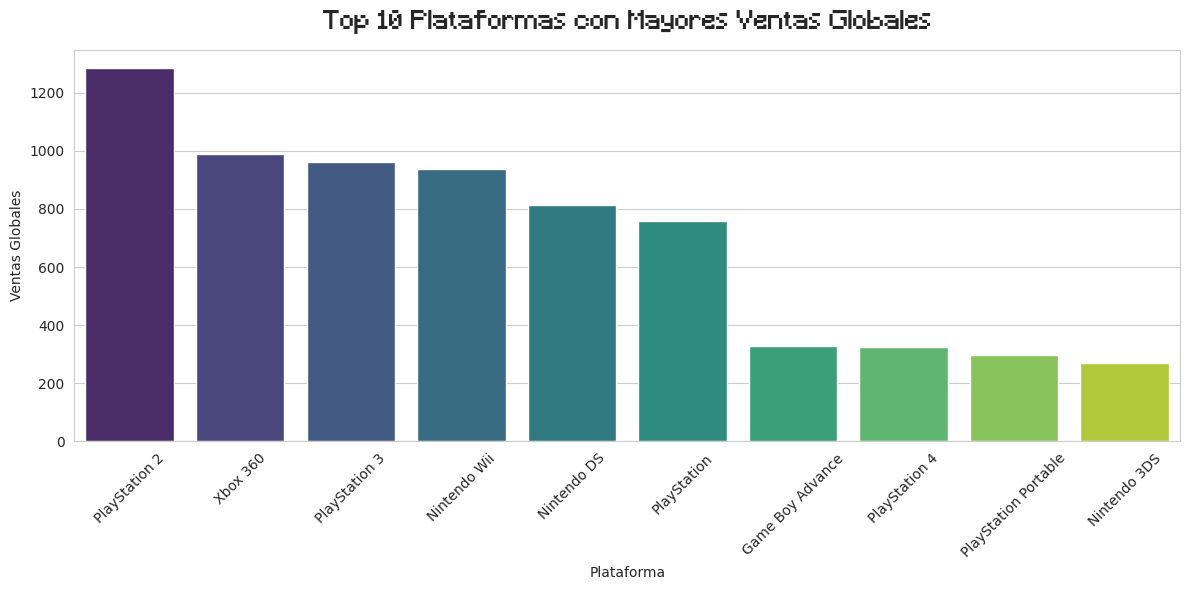

In [201]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_platforms.index, y=top_platforms.values, palette='viridis')
plt.title('Top 10 Plataformas con Mayores Ventas Globales', fontweight='bold', fontproperties= font_videogames, fontsize =18, pad = 15)
plt.xlabel('Plataforma')
plt.ylabel('Ventas Globales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### ¿Qué géneros de videojuegos son los que mayor se venden?


In [202]:
#Primero usamos el metodo "groupby()" para ordenar las ventas globales por la columna de las generos, despues utilizamos "sum()" para obtener las ventas totales por genero. Guardamos esto en una nueva variable.
sales_by_gender = df_clean.groupby('genre')['global_sales'].sum()

#Usamos la nueva variable y con "sort_values()" ordenamos los valores de mayor a menor.
sales_by_gender_sorted = sales_by_gender.sort_values(ascending=False)

#Mostramos con "head()" el top 10 de los generos con mayores ventas
top_genders = sales_by_gender_sorted.head(10)
print("--" * 20)
print(top_genders)
print("--" * 20)

----------------------------------------
genre
Action          1771.73
Sports          1350.61
Shooter         1086.67
Role-Playing     958.62
Platform         850.73
Misc             830.19
Racing           757.92
Fighting         467.91
Simulation       394.12
Puzzle           243.65
Name: global_sales, dtype: float64
----------------------------------------


<ipython-input-203-186e065b3326>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genders.index, y=top_genders.values, palette='Set2')


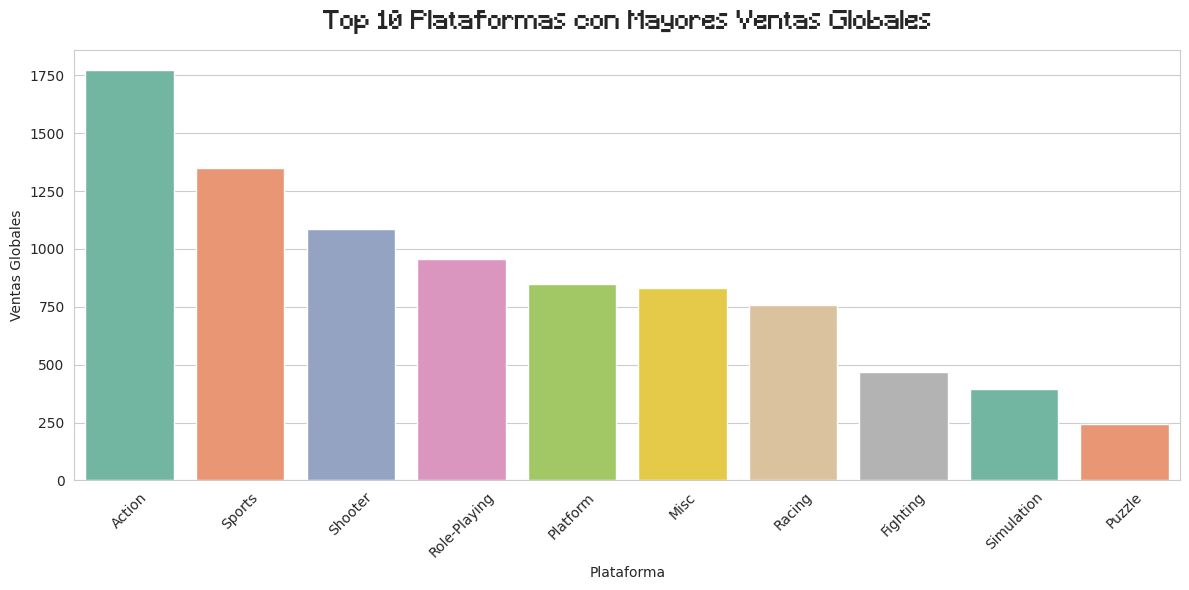

In [203]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_genders.index, y=top_genders.values, palette='Set2')
plt.title('Top 10 Plataformas con Mayores Ventas Globales', fontweight='bold', fontproperties= font_videogames, fontsize =18, pad = 15)
plt.xlabel('Plataforma')
plt.ylabel('Ventas Globales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##¿Qué relación existe entre las puntuaciones de críticos y usuarios y las ventas globales?

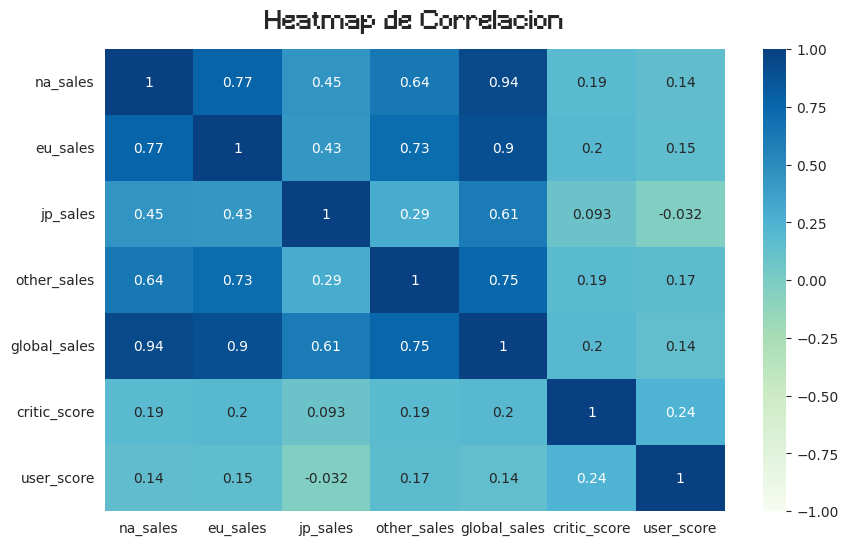

In [204]:
#validaremos si existe correlacion entre las ventas globales, por region y la puntuación de los criticos y usuarios
#elegemis las columnas númericas que son númericas y relevantes para calcular nuestra correlación
columnas_corr = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales',
                  'global_sales', 'critic_score', 'user_score']

# Crear la matriz de correlación
matriz_correlacion = df_clean[columnas_corr].corr()

# Dibujar el mapa de calor con Seaborn
#lienzo
plt.figure(figsize=(10, 6))
sns.heatmap(matriz_correlacion, annot=True, cmap='GnBu', vmin=-1, vmax=1)
plt.title('Heatmap de Correlacion', fontweight='bold', fontproperties= font_videogames, fontsize =18, pad = 15)
plt.show()

In [205]:
#La correlación entre las puntuaciones de la crítica y de los usuarios con las ventas globales es positiva, pero no tan fuerte como la relación entre las diferentes regiones y las ventas globales.
# Esto sugiere que las reseñas, tanto de la crítica como de los usuarios, influyen en las ventas, pero no son el único factor determinante.

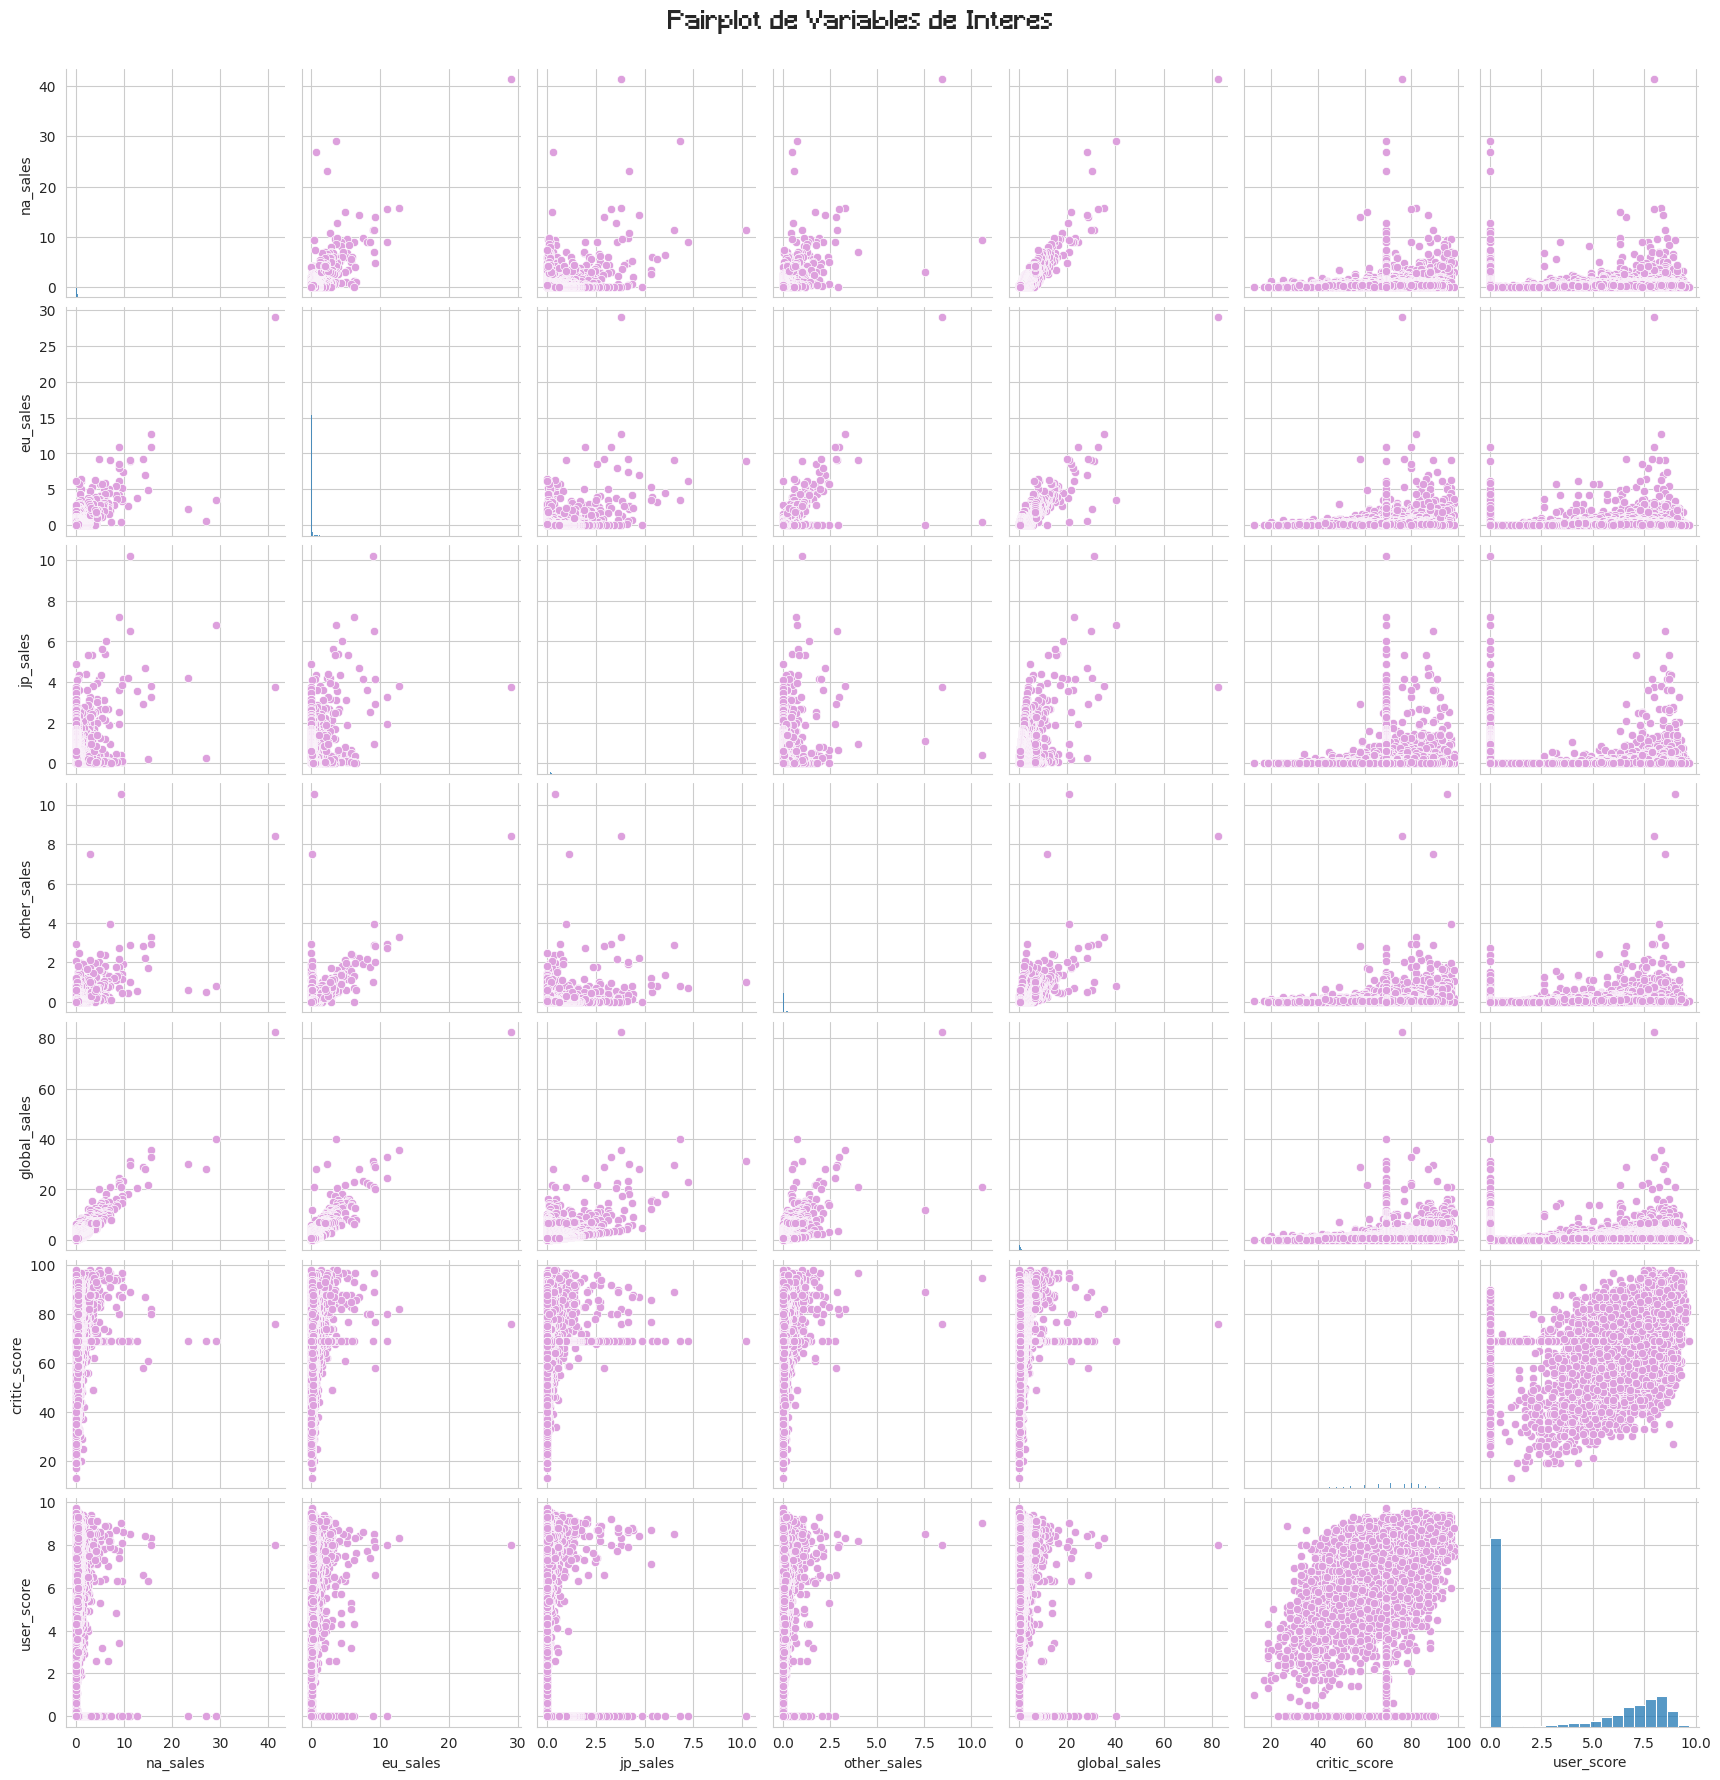

In [206]:
#Elaboramos un pairplot de las columnas de interes de ventas y scores
sns.pairplot(df_clean[columnas_corr], plot_kws={'color': 'plum'}) # kws Permite pasar parámetros de estilo a los gráficos individuales en el par de gráficos.
plt.suptitle('Pairplot de Variables de Interes', fontproperties=font_videogames, fontsize=18, y=1.02)  # Aumenta y para más espacio ya que suptitle no tiene la propiedad pad
plt.show()

Ventas por región: Vemos una posible correlación positiva entre las ventas en diferentes regiones (NA, EU, JP, etc.) y las ventas globales. Esto nos indica que si un juego vende bien en una región, es probable que también venda bien en otras.

Puntuaciones y ventas: Podrías observar una correlación positiva entre las puntuaciones de críticos y usuarios y las ventas globales, aunque esta relación podría es un poco más débil que la correlación entre las diferentes regiones.

Observamos también una correlación positiva entre critc score y user score lo que tendría sentido pues si un juego es bueno tendra buenas reseñas tanto por criticos como por usuarios

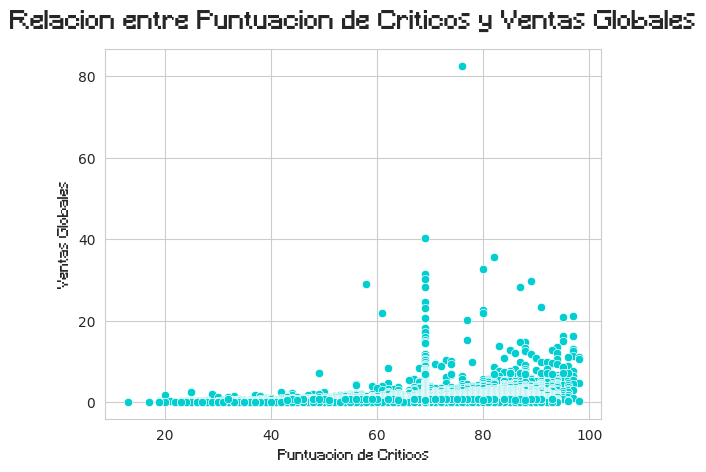

In [207]:
#Scatterplot entre Ventas Globales y Puntuación de Críticos
style = sns.set_style('whitegrid')
sns.scatterplot(data=df_clean, x='critic_score', y='global_sales', color = 'darkturquoise')
plt.title('Relacion entre Puntuacion de Criticos y Ventas Globales', fontproperties= font_videogames, fontsize =18, pad = 15, fontweight = True)
plt.xlabel('Puntuacion de Criticos', fontproperties= font_videogames, fontsize =10)
plt.ylabel('Ventas Globales', fontproperties= font_videogames, fontsize =10)
plt.show()


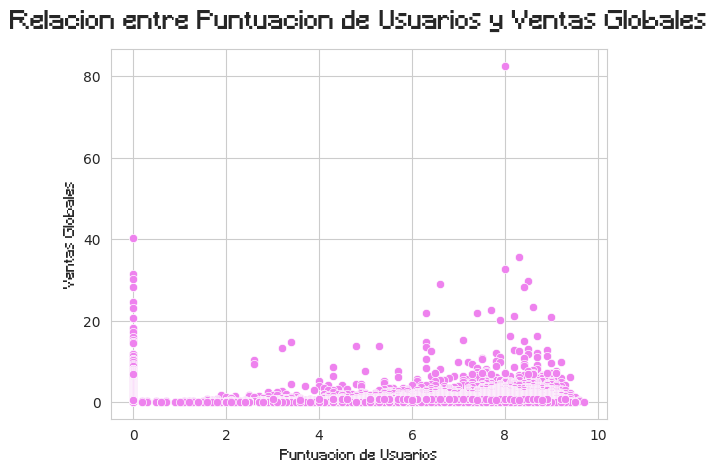

In [208]:
#Scatterplot entre Ventas Globales y Puntuación de Usuarios
style = sns.set_style('whitegrid')
sns.scatterplot(data=df_clean, x='user_score', y='global_sales', color = 'violet')
plt.title('Relacion entre Puntuacion de Usuarios y Ventas Globales', fontproperties= font_videogames, fontsize =18, pad = 15)
plt.xlabel('Puntuacion de Usuarios', fontproperties= font_videogames, fontsize =10)
plt.ylabel('Ventas Globales', fontproperties= font_videogames, fontsize =10)
plt.show()


In [209]:
# Las reseñas positivas de los críticos parecen tener un impacto más directo en las ventas globales que las opiniones de los usuarios.
# Tanto en un caso como en otro, existen muchos otros factores que influyen en el éxito comercial de un videojuego, y la puntuación de críticos y usuarios es solo una parte

El gráfico muestra una relación interesante entre la puntuación de los usuarios y las ventas globales de los videojuegos. Observamos que algunos juegos con una puntuación de usuarios cercana a 0 tienen ventas sorprendentemente altas. Esto podría explicarse por varios factores, como la falta de reseñas debido a lanzamientos recientes o juegos de nicho, estrategias de marketing agresivas que impulsan las ventas iniciales, o simplemente errores en la recopilación de datos. Sin embargo, es fundamental realizar un análisis más profundo, considerando factores como el género del juego, la plataforma y el tiempo de lanzamiento, para comprender completamente esta relación y obtener conclusiones más sólidas. Al comparar estos datos con otras fuentes de información y analizar tendencias a lo largo del tiempo, podemos obtener una visión más completa de los factores que influyen en el éxito comercial de los videojuegos

##¿Podemos predecir las ventas globales usando puntuaciones de críticos y usuarios?

In [210]:
#usaraemos Cross-Validation para evaluar el rendimiento de un modelo de predicción donde buscaremos predecir las ventas globales usando puntuaciones de críticos y usuarios
# Definimos las variables predictoras y la variable objetivo
X = df_clean[['critic_score', 'user_score']]  # Variables independientes
y = df_clean['global_sales']  # Variable objetivo

# Creamos el modelo
lr_cr = LinearRegression()

# Validación cruzada con 5 divisiones,
kf = KFold(n_splits=5, shuffle=True)
scores = cross_val_score(lr_cr, X, y, cv=kf, scoring='r2')   #cv es esencial para definir cómo se realizará la validación cruzada

print(f'R² promedio en Validación Cruzada: {scores.mean():.4f}')

R² promedio en Validación Cruzada: 0.0533


El valor de R² promedio nos indica que nuestras variables predictoras (puntuaciones de críticos y usuarios) explican apenas un 5.44% de la variabilidad en las ventas globales.

Podemos deducir que entonces las puntuaciones de críticos y usuarios, por sí solas, no son suficientes para explicar de manera significativa las ventas globales de los videojuegos.
Deben existir otras variables importantes como el género del juego, la plataforma, el presupuesto de marketing, la fecha de lanzamiento, etc., que influyan significativamente en las ventas.

## DISTRIBUCIONES MUESTRALES Y TÉCNICAS DE EVALUACIÓN DE MODELOS

### Bootstrap

In [211]:
global_sales = df_clean['global_sales']

# Generación de muestras y cálculo de medias bootstrap
means = []

for i in range(500_000):
  sample = global_sales.sample(n=50, replace=True)
  means.append(sample.mean())

serie_means = pd.Series(means)

Validacion de Sesgos

In [212]:
# Definir n (número de elementos en cada muestra) y R (número de repeticiones)
n = len(df_clean)  # Tamaño de la muestra
R = 500_000        # Número de repeticiones para el bootstrap




In [213]:
# Almacenar las medidas estadísticas
bootstrap_means = []
bootstrap_medians = []

In [214]:
# Almacenar las medidas estadísticas
bootstrap_means = []
bootstrap_medians = []

# Realizar el proceso de bootstrap
for _ in range(R):
    # Paso 1: Tomar un elemento de manera aleatoria con reposición
    sample = df_clean['global_sales'].sample(n=n, replace=True)

    # Paso 2: Tomar la medida estadística
    bootstrap_means.append(sample.mean())
    bootstrap_medians.append(sample.median())

# Convertir a Series
bootstrap_means = pd.Series(bootstrap_means)
bootstrap_medians = pd.Series(bootstrap_medians)


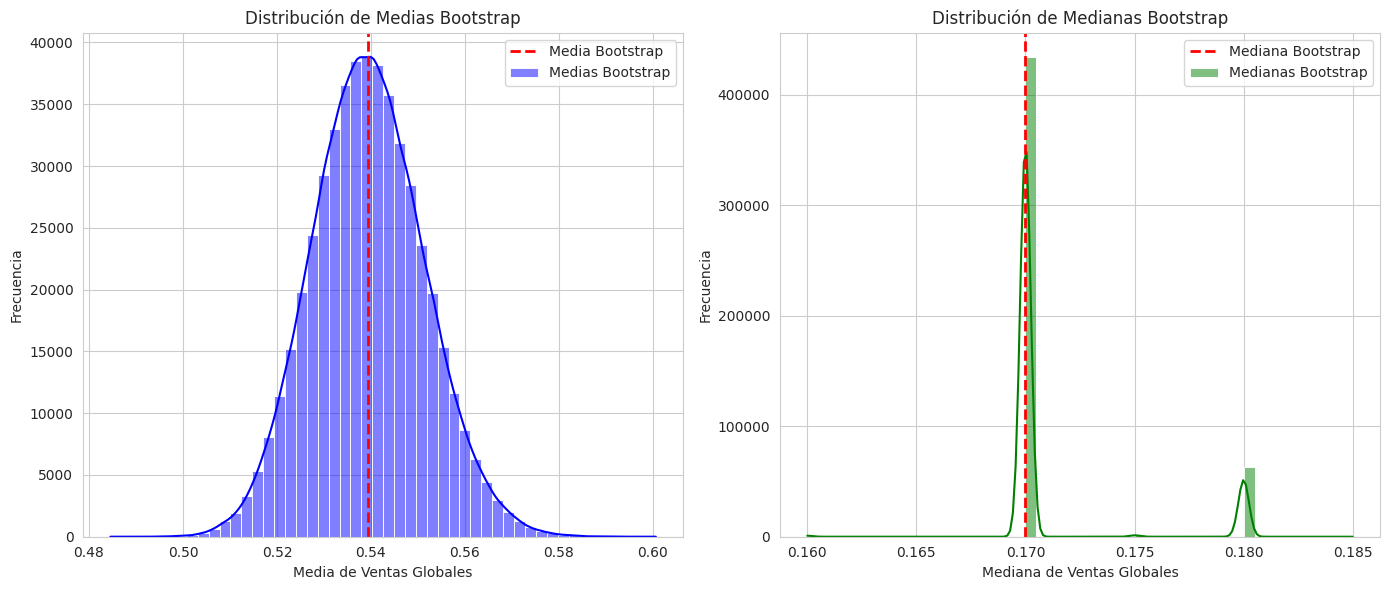

In [215]:
# a) Generar un histograma
plt.figure(figsize=(14, 6))

# Histograma de medias bootstrap
plt.subplot(1, 2, 1)
sns.histplot(bootstrap_means, bins=50, kde=True, color='blue', label='Medias Bootstrap')
plt.axvline(bootstrap_means.mean(), color='red', linestyle='dashed', linewidth=2, label='Media Bootstrap')
plt.title('Distribución de Medias Bootstrap')
plt.xlabel('Media de Ventas Globales')
plt.ylabel('Frecuencia')
plt.legend()

# Histograma de medianas bootstrap
plt.subplot(1, 2, 2)
sns.histplot(bootstrap_medians, bins=50, kde=True, color='green', label='Medianas Bootstrap')
plt.axvline(bootstrap_medians.median(), color='red', linestyle='dashed', linewidth=2, label='Mediana Bootstrap')
plt.title('Distribución de Medianas Bootstrap')
plt.xlabel('Mediana de Ventas Globales')
plt.ylabel('Frecuencia')
plt.legend()

plt.tight_layout()
plt.show()


In [216]:
# b) Calcular el error estándar
mean_se = bootstrap_means.std()
median_se = bootstrap_medians.std()

print(f'Error estándar de la media: {mean_se:.4f}')
print(f'Error estándar de la mediana: {median_se:.4f}')


Error estándar de la media: 0.0119
Error estándar de la mediana: 0.0034


En el análisis de bootstrap, los errores estándar obtenidos son 0.0119 para la media y 0.0034 para la mediana. Estos valores bajos indican que las estimaciones de la media y la mediana son precisas, con poca variabilidad en torno a los valores originales. La menor variabilidad en la mediana sugiere que es una medida más robusta y menos afectada por valores extremos, lo que refuerza su confiabilidad para representar el centro de los datos.



### ¿Hay juegos con buenas calificaciones que venden poco? ¿Y juegos mal calificados que venden mucho?
Subpregunta ¿Existen diferencias significativas en las ventas entre videojuegos con puntuaciones altas y bajas de críticos o usuarios?


In [217]:
# Clasificamos los juegos en dos grupos según las puntuaciones de críticos
high_critics = df_clean[df_clean['critic_score'] > 80]  # Juegos con puntuaciones críticas altas
low_critics = df_clean[df_clean['critic_score'] <= 80]  # Juegos con puntuaciones críticas bajas


In [218]:
# Calculamos las medias de ventas de cada grupo
mean_high = high_critics['global_sales'].mean()
mean_low = low_critics['global_sales'].mean()

# Establecemos la estadística de interés: diferencia de medias
observed_diff = mean_high - mean_low


In [219]:
# Combinamos los grupos
combined_sales = pd.concat([high_critics['global_sales'], low_critics['global_sales']])

# Número de permutaciones
R = 10000
perm_diffs = []

# Realizamos el test de permutación
for _ in range(R):
    # Revolvemos los datos
    permuted_sales = np.random.permutation(combined_sales)

    # Creamos el nuevo grupo A y B
    new_group_a = permuted_sales[:len(high_critics)]
    new_group_b = permuted_sales[len(high_critics):]

    # Calculamos la diferencia de medias
    perm_diff = new_group_a.mean() - new_group_b.mean()
    perm_diffs.append(perm_diff)


In [220]:
# Convertimos a un array de numpy para facilitar los cálculos
perm_diffs = np.array(perm_diffs)

# Calculamos el valor p
p_value = np.mean(np.abs(perm_diffs) >= np.abs(observed_diff))

# Resultados
print(f"Diferencia observada en medias: {observed_diff:.4f}")
print(f"Valor p: {p_value:.4f}")


Diferencia observada en medias: 1.1277
Valor p: 0.0000


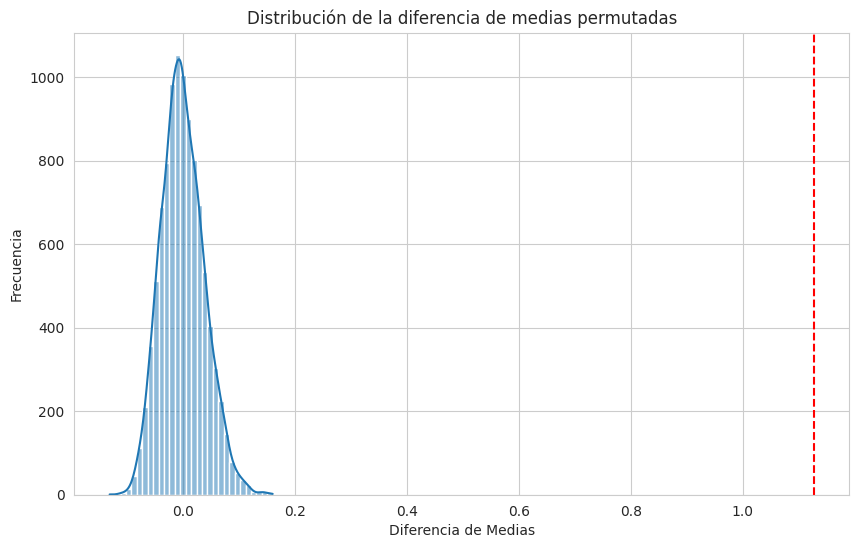

In [221]:
# Visualización de la distribución de diferencias permutadas
plt.figure(figsize=(10, 6))
sns.histplot(perm_diffs, bins=30, kde=True)
plt.axvline(observed_diff, color='red', linestyle='--')
plt.title("Distribución de la diferencia de medias permutadas")
plt.xlabel("Diferencia de Medias")
plt.ylabel("Frecuencia")
plt.show()


La diferencia observada en medias es de 1.1277, lo que indica que, en promedio, los videojuegos con puntuaciones críticas altas (mayores a 80) venden 1.1277 millones de unidades más que aquellos con puntuaciones críticas bajas (80 o menos). Además, el valor p de 0.0000 sugiere una evidencia muy fuerte en contra de la hipótesis nula, lo que implica que hay una diferencia significativa en las ventas entre estos dos grupos. Los resultados respaldan la idea de que los juegos con mejores críticas tienden a vender más que los mal calificados.

### ¿Cuál es la media estimada de las ventas globales para un videojuego?

In [222]:
# Media estimada de ventas globales en el conjunto de datos original
global_sales.mean()

0.5394410965378708

In [223]:
#Media estimada a partir de la distribución bootstrap
serie_means.mean()

0.5399507712000001

### ¿Qué tan variable es la media de las ventas globales de videojuegos?

In [224]:
error_std = serie_means.std()
print(f"Error estándar: {error_std}")
print(f"Asimetría: {serie_means.skew()}")
print(f"Curtosis: {serie_means.kurtosis()}")

Error estándar: 0.2199507855395236
Asimetría: 2.412723572587261
Curtosis: 11.725593521784395


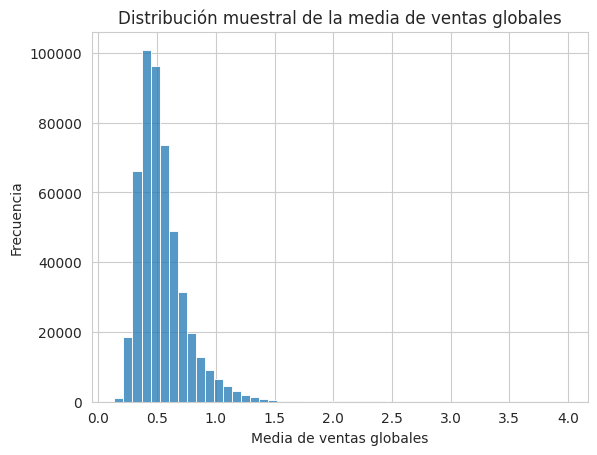

In [225]:
sns.histplot(serie_means, kde=False, bins=50)
plt.title("Distribución muestral de la media de ventas globales")
plt.xlabel("Media de ventas globales")
plt.ylabel("Frecuencia")
plt.show()

<Axes: >

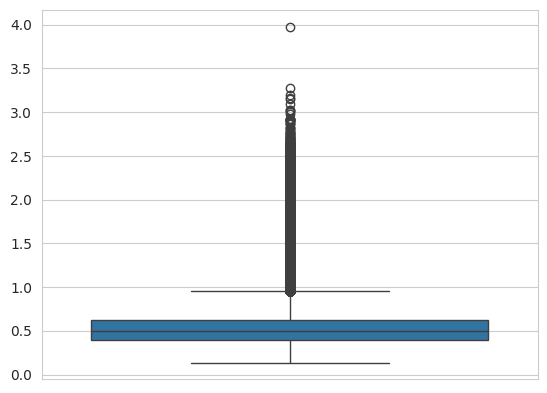

In [226]:
sns.boxplot(serie_means)

### ¿Cuál es el intervalo de confianza del 99% de las ventas globales promedio de un videojuego?

In [227]:
means_bottom = serie_means.quantile(0.005)
means_top = serie_means.quantile(0.995)
print(f"Intervalo de confianza del 99% de la media: {means_bottom} < {global_sales.mean()} < {means_top}")

Intervalo de confianza del 99% de la media: 0.23159999999999997 < 0.5394410965378708 < 1.4736010000000013


In [228]:
mean_of_intervals = ((global_sales.mean() - means_bottom) + (means_top - global_sales.mean())) / 2

print(f'Intervalo de 99% confianza de la media: {global_sales.mean()} +/- {mean_of_intervals}')

Intervalo de 99% confianza de la media: 0.5394410965378708 +/- 0.6210005000000006


<ipython-input-229-49d2e3137c73>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(serie_means, kde=False, norm_hist=False)


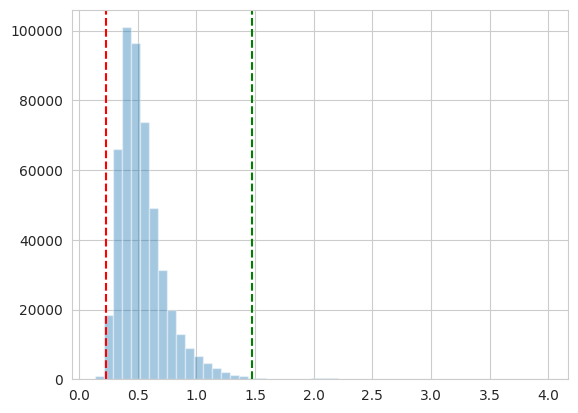

In [229]:
sns.distplot(serie_means, kde=False, norm_hist=False)
plt.axvline(means_bottom, color='red', linestyle='--', label=f'Límite inferior ({means_bottom:.2f})')
plt.axvline(means_top, color='green', linestyle='--', label=f'Límite superior ({means_top:.2f})')


###Análisis de Clusters de Videojuegos: Relación entre Puntuaciones y Ventas Globales


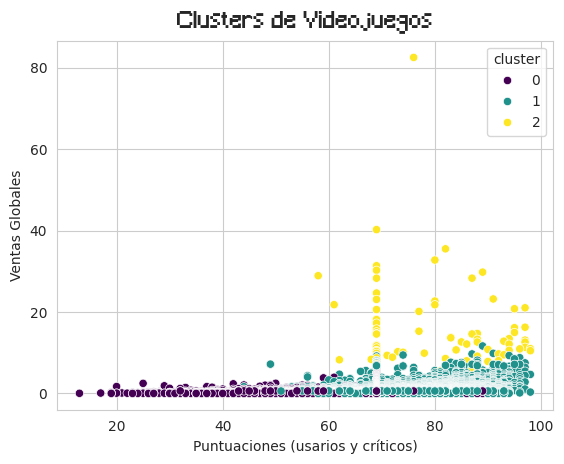

In [230]:
#El clustering permite identificar patrones en las puntuaciones de los críticos y usuarios en relación con las ventas.
#Esto ayuda a entender qué elementos pueden influir en el éxito comercial de un videojuego.
# Seleccionamos las columnas numéricas a usar en el clustering
X = df_clean[['na_sales', 'eu_sales', 'jp_sales', 'critic_score', 'user_score']]

# Escalamos los datos para que todas las variables tengan igual peso
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicamos K-means con 3 clusters
kmeans = KMeans(n_clusters=3)   #dividiremos en 3 partes el cluster
df_clean['cluster'] = kmeans.fit_predict(X_scaled)

# Visualizamos los clusters en un scatterplot
sns.scatterplot(data=df_clean, x='critic_score', y='global_sales', hue='cluster', palette='viridis')
plt.xlabel('Puntuaciones (usarios y críticos)', fontsize =10)
plt.ylabel('Ventas Globales', fontsize =10)
plt.title('Clusters de Videojuegos', fontproperties= font_videogames, fontsize =16, pad = 10)


plt.show()


Posibles Interpretaciones de los Clusters:

Basándonos en la distribución de los puntos en el gráfico, podemos hacer algunas inferencias sobre lo que cada cluster podría representar:

* Cluster 1 (color morado)
Videojuegos independientes o de nicho: Estos juegos suelen tener puntuaciones de crítica más bajas y ventas globales más modestas. Podrían ser juegos indie, juegos con temáticas muy específicas o juegos que no han recibido una gran promoción. Otra opción son videojuegos que se volvieron populares debido al marketing.

* Cluster 2 (color verde):
Videojuegos de gran éxito comercial: Estos juegos suelen tener puntuaciones de crítica moderadas a altas y ventas globales muy altas. Son los juegos que todos conocemos y que suelen estar en las listas de los más vendidos.

* Cluster 3 (color amarillo):
Videojuegos con alta puntuación de crítica pero bajas ventas: Este cluster podría incluir juegos que han sido muy bien recibidos por la crítica, pero que no han logrado alcanzar un gran éxito comercial. Podrían ser juegos con mecánicas de juego innovadoras o con temáticas muy específicas que no han conectado con el público general.

### Matriz de confusión

In [231]:
# Definir una nueva columna para la variable objetivo (Éxito Fracaso)
df_clean['success'] = df_clean['global_sales'] > df_clean['global_sales'].median()  # Clasificar basado en la mediana de ventas
df_clean['success'] = df_clean['success'].astype(int)  # Convertir a 0 y

# Seleccionar características y variable objetivo
X = df_clean[['critic_score', 'user_score']]
y = df_clean['success']


In [232]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [233]:
# Entrenar un modelo de clasificación ( Random Forest)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [234]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)


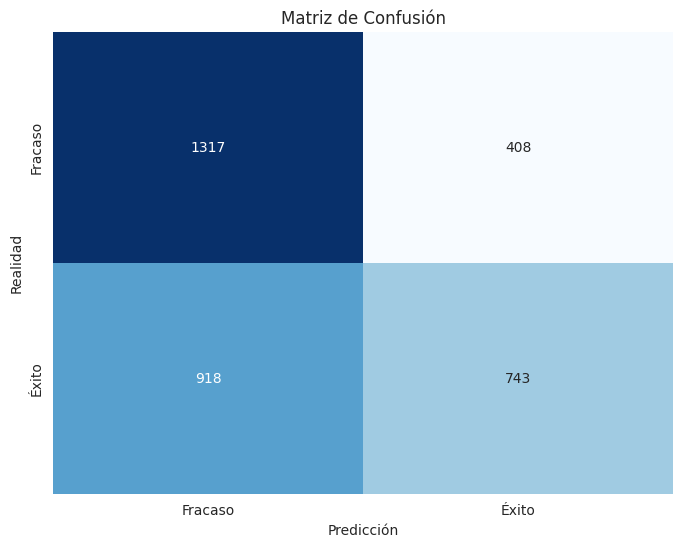

In [235]:
# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusióm,
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Fracaso', 'Éxito'], yticklabels=['Fracaso', 'Éxito'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()
